In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import tree

In [3]:
df = pd.read_csv("adult income1.csv", na_values = ["?"])
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [4]:
df.shape

(31947, 12)

In [5]:
df.isna().sum()

age                  0
workclass         1778
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1785
relationship         0
race                 0
sex                  0
native.country      25
income               0
dtype: int64

In [6]:
df = df.dropna(axis = 0)
df.shape

(30162, 12)

EDA & Data Cleaning

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
native.country    object
income            object
dtype: object

[]

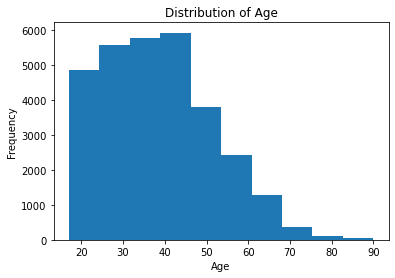

In [8]:
#Distribution of Age
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.plot()

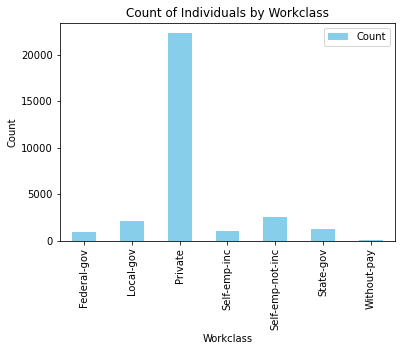

In [9]:
#workclass
df_workclass = df.groupby("workclass").size().reset_index(name = 'Count')
df_workclass.plot(x='workclass', y='Count', kind='bar', color='skyblue')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Count of Individuals by Workclass')
plt.show()

In [10]:
df_ed = df[["education", "income"]]
df_ed["income"][df_ed["income"] == "<=50K"] = 0
df_ed["income"][df_ed["income"] == ">50K"] = 1
df_ed["income"] = df_ed["income"].astype(int)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-10-409b9f61fbb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed["income"] = df_ed["income"].astype(int)


In [11]:
df_ed.groupby("education")[["income"]].mean()

,income
education,
10th,0.071951
11th,0.056298
12th,0.076923
1st-4th,0.039735
5th-6th,0.041667
7th-8th,0.062837
9th,0.054945
Assoc-acdm,0.253968
Assoc-voc,0.263198


In [12]:
#education
def replace_education_level(education):
    # First condition for 'no_highschool_deg'
    if education in ['11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']:
        return 'no_highschool_deg'
    # Second condition for 'others'
    elif education in ['Assoc-voc', 'Assoc-acdm']:
        return 'Associate'
    elif education in ['Some-college']:
        return 'college degree'
    elif education in ['Doctorate', 'Prof-school']:
        return 'Doctor/Prof'
    # If none of the above conditions are met, return the original education value
    else:
        return education
    
df["education"] = df["education"].apply(replace_education_level)

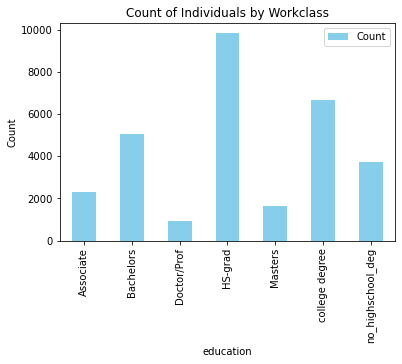

In [13]:
#education
df_education = df.groupby("education").size().reset_index(name = 'Count')
df_education.plot(x='education', y='Count', kind='bar', color='skyblue')
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Count of Individuals by Workclass')
plt.show()

In [14]:
df.groupby("education")["education.num"].mean().reset_index()
#Education number quantifies the education level from no_high school degree ~ Doctorate

,education,education.num
0,Associate,11.435421
1,Bachelors,13.000000
2,Doctor/Prof,15.408942
3,HS-grad,9.000000
4,Masters,14.000000
5,college degree,10.000000
6,no_highschool_deg,5.609730


In [15]:
#marital.status
df["marital.status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [16]:
df_ms = df[["marital.status", "income"]]
df_ms["income"][df_ms["income"] == "<=50K"] = 0
df_ms["income"][df_ms["income"] == ">50K"] = 1
df_ms["income"] = df_ms["income"].astype(int)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-16-6c0aa2485b36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms["income"] = df_ms["income"].astype(int)


In [17]:
df_ms.groupby("marital.status")["income"].mean()

marital.status
Divorced                 0.107262
Married-AF-spouse        0.476190
Married-civ-spouse       0.454959
Married-spouse-absent    0.083784
Never-married            0.048324
Separated                0.070288
Widowed                  0.096735
Name: income, dtype: float64

In [18]:
def replace_marital_status(marital_status):
    # First condition for 'married'
    if marital_status in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'married'
    # Second condition for 'separated'
    elif marital_status in ['Separated', 'Divorced', 'Widowed']:
        return 'separated'
    elif marital_status in ['Married-spouse-absent']:
        return 'married - absent'
    # If none of the above conditions are met, return the original marital status value
    else:
        return marital_status

In [19]:
df["marital.status"] = df["marital.status"].apply(replace_marital_status)

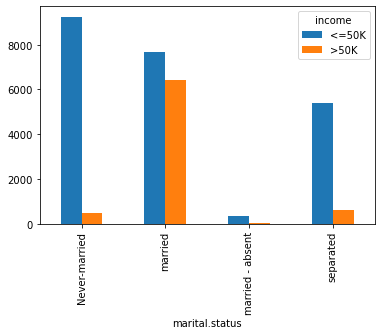

In [20]:
ms_income = pd.crosstab(df["marital.status"], df["income"])
ms_income.plot(kind = "bar", stacked = False)
plt.show()

In [21]:
#occupation
df["occupation"].unique()

array(['occupation', 'Handlers-cleaners', 'Other-service', 'Adm-clerical',
       'Sales', 'Craft-repair', 'Farming-fishing', 'Prof-specialty',
       'Tech-support', 'Priv-house-serv', 'Machine-op-inspct',
       'Protective-serv', 'Transport-moving', 'Exec-managerial',
       'Armed-Forces'], dtype=object)

In [22]:
#relationship
df["relationship"].unique()

array(['Own-child', 'Not-in-family', 'Other-relative', 'Husband',
       'Unmarried', 'Wife'], dtype=object)

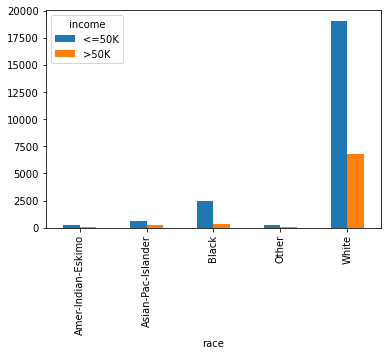

In [23]:
#race
race_income = pd.crosstab(df["race"], df["income"])
race_income.plot(kind = "bar", stacked = False)
plt.show()

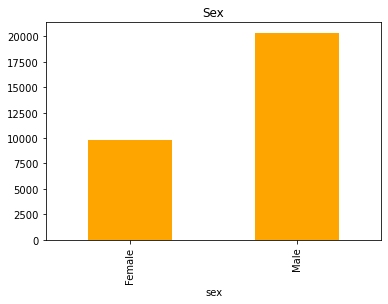

In [24]:
#sex
df.groupby("sex").size().plot(kind = "bar", color = "orange")
plt.title("Sex")
plt.show()

In [25]:
#native country
df["native.country"].unique()
# Not going to modify this column as it is not related to our research question

array(['United-States', 'India', 'Mexico', 'Puerto-Rico', 'Canada',
       'Haiti', 'El-Salvador', 'Poland', 'England', 'Peru',
       'Dominican-Republic', 'Scotland', 'Columbia', 'Honduras',
       'Jamaica', 'Philippines', 'Vietnam', 'Guatemala', 'Thailand',
       'Japan', 'Nicaragua', 'South', 'Hong', 'Laos', 'Germany',
       'Yugoslavia', 'Italy', 'Portugal', 'Ecuador',
       'Outlying-US(Guam-USVI-etc)', 'Cuba', 'Taiwan', 'Greece', 'Iran',
       'Ireland', 'China', 'France', 'Hungary', 'Cambodia',
       'Trinadad&Tobago', 'Holand-Netherlands'], dtype=object)

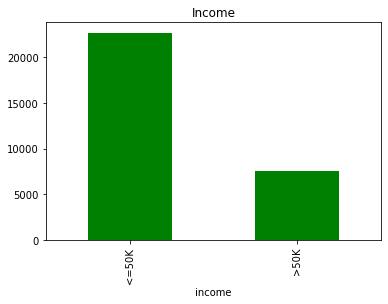

In [26]:
#income: Response variable
df.groupby("income").size().plot(kind = "bar", color = "green")
plt.title("Income")
plt.show()

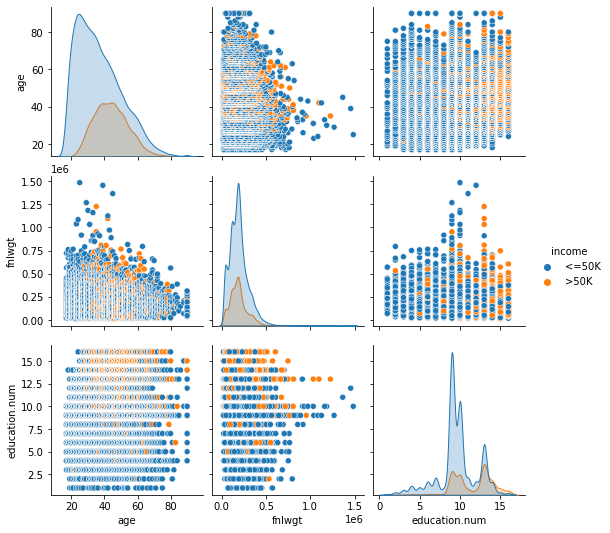

In [27]:
# Explore relationships between features
sns.pairplot(df, hue='income')
plt.show()

***Research Questions***

- Is there significant differences in income between gender, and is difference in education level causing the gap of income? 
- Which factors contribute the most to income/ help us understand where income inequality stems from?

Research Question 1.

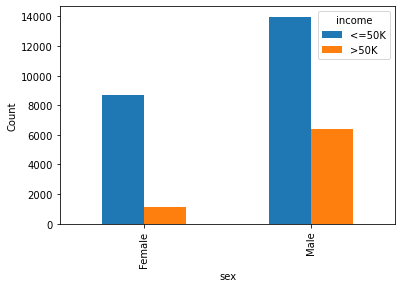

In [28]:
#sex
sex_income = pd.crosstab(df["sex"], df["income"])
sex_income.plot(kind = "bar", stacked = False)
plt.ylabel("Count")
plt.show()

We calculated the proportion of people how earn more than 50K per year by gender, and conducted a one-tailed z-test for two proportions ($\alpha$ = 0.05) to clarify if there is a difference between income by sex. Here we used one-tailed test as we can simply calculate that the proportion of male is larger than that of female from the data.

- p = proportion of who earn more than 50K
- HO: p_male <= p_female
- H1: p_male > p_female

In [29]:
df_sx = df[["sex",'fnlwgt', "income"]]
df_sx["income"][df_sx["income"] == "<=50K"] = 0
df_sx["income"][df_sx["income"] == ">50K"] = 1
df_sx["income"] = df_sx["income"].astype(int)

<ipython-input-29-f819430f8b3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sx["income"][df_sx["income"] == "<=50K"] = 0
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-29-f819430f8b3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sx["income"][df_sx["income"] == ">50K"] = 1
<ipython-input-29-f819430f8b3a>:4: S

In [30]:
df_sx.groupby("sex").agg({"income" : ["sum", "count"]})

income       
          sum  count
sex                 
Female   1112   9782
Male     6396  20380

In [31]:
#proportion z-test
n_male = 20380
male_over_50 = 6396
n_female = 9782
female_over_50 = 1112

z, p = sm.stats.proportions_ztest([male_over_50, female_over_50],
                                 [n_male, n_female], alternative = "larger")
print(f"Z-score: {z}")
print(f"p-value: {p}")

Z-score: 37.63451605872578
p-value: 2.93120735066407e-310


In [32]:
#Sex vs Education level
df.groupby("sex")[["education.num"]].agg(["mean", "count"]).reset_index()

sex education.num       
                   mean  count
0  Female     10.098651   9782
1    Male     10.132188  20380

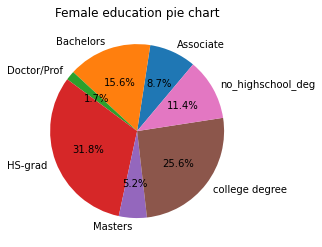

In [33]:
df[df["sex"] == "Female"].groupby("education").size().plot(kind = "pie", autopct = '%1.1f%%', startangle = 50)
plt.ylabel("")
plt.title("Female education pie chart")
plt.show()

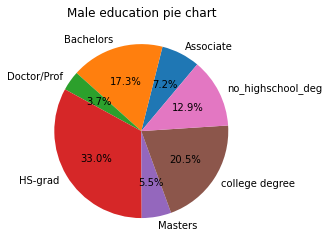

In [34]:
df[df["sex"] == "Male"].groupby("education").size().plot(kind = "pie", autopct = '%1.1f%%', startangle = 50)
plt.ylabel("")
plt.title("Male education pie chart")
plt.show()

We conducted 2 sample t-test ($\alpha$ = 0.05)to evaluate difference in education levels between genders. The variable "education number" was leveraged, which reflects the educational status of each individual. If there exists a statistically significant difference in the mean education numbers between male and female individuals.

- H0: Mu_male = Mu_female
- H1: Mu_male != Mu_female

In [35]:
#2 sample t test (2 tailed)
edu_female = df["education.num"][df["sex"] == "Female"]
edu_male = df["education.num"][df["sex"] == "Male"]
t,p = ttest_ind(edu_male, edu_female)
print(f"T-statistic: {t}")
print(f"P-value: {p}")

T-statistic: 1.0692582794527892
P-value: 0.2849618618376658


Since the p-value is way bigger than the pre-defined significance level 0.05, we fail to reject the null hypothesis, and concluded that there is no sufficient evidence to suggest that there is a difference in education level between male and female.

So, for our research question, "*Is there significant differences in income between gender, and is difference in education level causing the gap of income?*", we can conclude that it is true that there is a significant evidence that male earns more money than female does. However, as there is no evidence to claim that there is a difference in education level between two genders, education level is not a factor which causes the difference.

Research Question 2.

For research question 2, as we are not aiming to build a prediction model with great accuracy, we did not seperate data into train and test set. However, we focused on finding the model that fits the data the best.

In [36]:
df2 = df.drop(["fnlwgt", "native.country"], axis = 1)
df2["income"][df2["income"] == "<=50K"] = 0
df2["income"][df2["income"] == ">50K"] = 1

<ipython-input-36-3c26c3d1e88d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["income"][df2["income"] == "<=50K"] = 0
<ipython-input-36-3c26c3d1e88d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["income"][df2["income"] == ">50K"] = 1


In [37]:
X = df2.drop(["income", "occupation", "relationship", "education"], axis = 1)
X = pd.get_dummies(X, drop_first = True)
X = sm.add_constant(X)
Y = df2["income"].astype("float")

In [38]:
logistic = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.381520
         Iterations 32


In [39]:
logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30145
Method:                           MLE   Df Model:                           16
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.3201
Time:                        23:13:58   Log-Likelihood:                -11507.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -8.3922      0.249    -33.747      0.000      -8.880      -7.905
age                                 0.0274      0.001     18.580      0.000       0.024       0.030
education.num                       0.4002      0.008     51.582      0.000       0.385       0.415
workclass_Local-gov                -0.6382      0.102     -6.251      0.000      -0.838      -0.438
workclass_Private                  -0.5147      0.086     -5.982      0.000      -0.683      -0.346
workclass_Self-emp-inc              0.0924      0.113      0.821      0.412      -0.128       0.313
workclass_Self-emp-not-inc         -0.9277      0.099     -9.356      0.000      -1.122      -0.733
workclass_State-gov                -0.8332      0.116     -7.201      0.000      -1.060      -0.606
workclass_Without-pay            -369.5602   4.79e+79  -7.71e-78      1.000    -9.4e+79     9.4e+79
marital.status_married              2.5895      0.057     45.499      0.000       2.478       2.701
marital.status_married - absent     0.5138      0.208      2.474      0.013       0.107       0.921
marital.status_separated            0.5697      0.071      8.080      0.000       0.432       0.708
race_Asian-Pac-Islander             0.2570      0.227      1.133      0.257      -0.187       0.702
race_Black                          0.3192      0.215      1.482      0.138      -0.103       0.742
race_Other                         -0.3099      0.336     -0.921      0.357      -0.969       0.349
race_White                          0.5521      0.206      2.679      0.007       0.148       0.956
sex_Male                            0.3097      0.046      6.766      0.000       0.220       0.399
===================================================================================================
"""

In [40]:
log_fit = logistic.predict(X)
threshold = 0.5
log_fit[log_fit < threshold ] = 0
log_fit[log_fit >= threshold ] = 1
cm_log = confusion_matrix(Y, log_fit)
cm_log

array([[20905,  1749],
       [ 3726,  3782]], dtype=int64)

In [41]:
(cm_log[0,0] + cm_log[1,1]) / len(log_fit)

0.8184802068828327

In [42]:
#decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X, Y)

DecisionTreeClassifier()

In [43]:
tree_fit = tree_model.predict(X)
cm_tree = confusion_matrix(Y, tree_fit)
cm_tree

array([[21412,  1242],
       [ 2591,  4917]], dtype=int64)

In [44]:
(cm_tree[0,0] + cm_tree[1,1]) / len(tree_fit)

0.8729195676679266

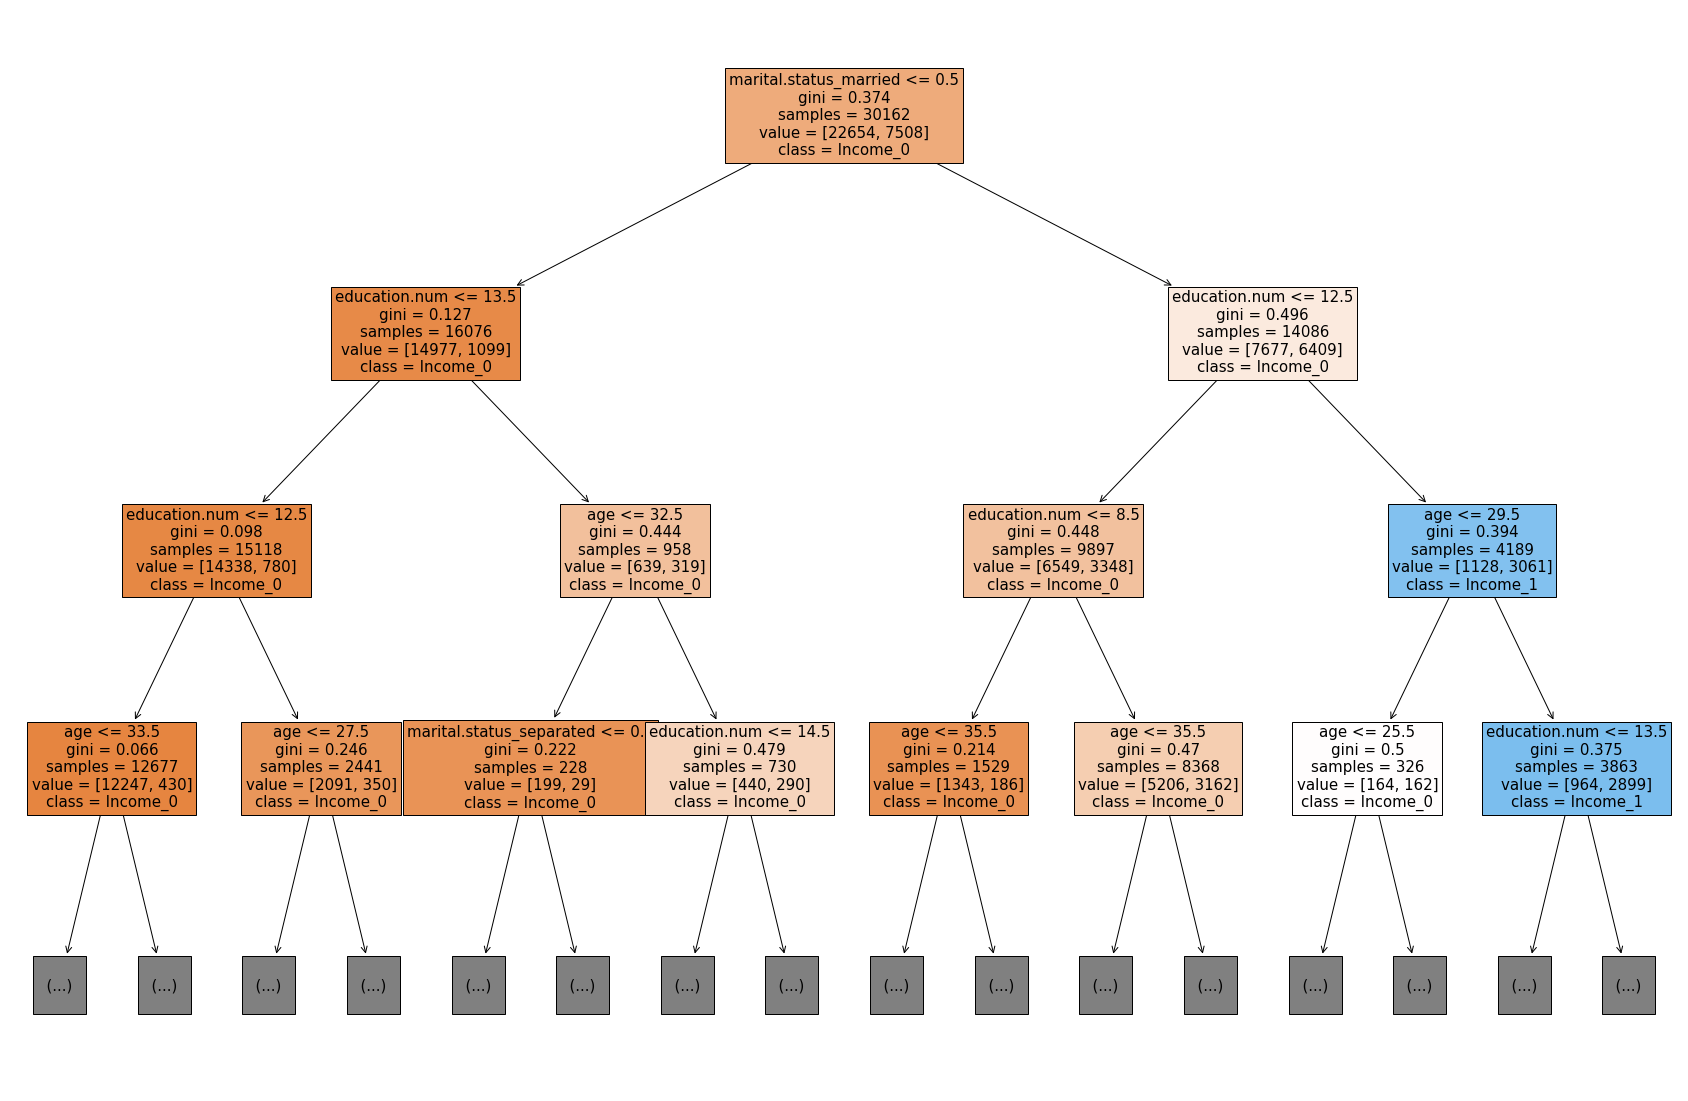

In [45]:
plt.figure(figsize=(30, 20))  # Adjust the figure size as necessary
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=['Income_0', 'Income_1'], max_depth = 3, fontsize = 15)
plt.show()

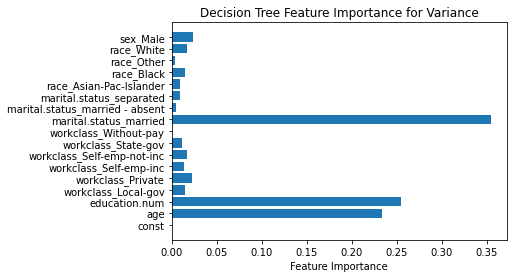

In [46]:
feature_importances = tree_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance for Variance')
plt.show()

- Logistic Regression
    - Observing the summary table of the logistic regression model with 82 percent accuracy for the training data, most distinguishable variables were age, education, and marital status.
- Decision Tree
    - Investigating the importance graph and tree plot of the decision tree model, most important variables were age, education, and marital status as well.

According to the insights provided by the models, we ran a deep analysis to find if there is a significant difference between each variable by gender. As we already conducted a test for education level for our research question 1, we only focused on analyzing age and marital status.

In [47]:
df3 = df2.copy()
df3 = df3[["sex", "age", "income"]]
conditions = [
    ((df3["age"] > 10) & (df3["age"] < 20)),
    ((df3["age"] >= 20) & (df3["age"] < 30)),
    ((df3["age"] >= 30) & (df3["age"] < 40)),
    ((df3["age"] >= 40) & (df3["age"] < 50)),
    ((df3["age"] >= 50) & (df3["age"] < 60)),
    ((df3["age"] >= 60) & (df3["age"] < 70)),
    (df3["age"] >= 70)
    
]

values = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - ']

# Using numpy.select to assign values based on conditions
df3["age_group"] = np.select(conditions, values, default=0)

df3 = df3.groupby(["sex", "age_group"])["income"].agg(['sum', 'count']).reset_index()
df3["proportion"] = df3["sum"] / df3["count"]
#df3.to_csv("age_sex_income.csv", index = False)

In [48]:
#df3_age.to_csv("Age vs Income.csv", index=False)

In [49]:
#df.to_csv("final_dataset.csv", index = False)

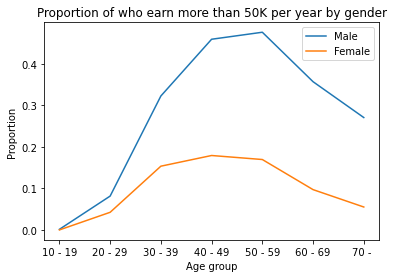

In [50]:
df3_male = df3[df3["sex"] == "Male"]
df3_female = df3[df3["sex"] == "Female"]
plt.plot(df3_male["age_group"], df3_male["proportion"], label = "Male")
plt.plot(df3_female["age_group"], df3_female["proportion"], label = "Female")
plt.title("Proportion of who earn more than 50K per year by gender")
plt.xlabel("Age group")
plt.ylabel("Proportion")
plt.legend()
plt.show()

The line graph above shows the relationship between income and age group. For both genders, we could observe that the proportion of people who earn more than 50K per year increases until 60, and starts to decrease after 60. As we concluded above, we can see the difference of proportions between genders as well.

In [51]:
df4 = df2.copy()
df4 = df4[["marital.status", "sex", "income"]]
df4["marital.status"] = np.where(df4["marital.status"] == "married", "Currently Married", "Not Married")

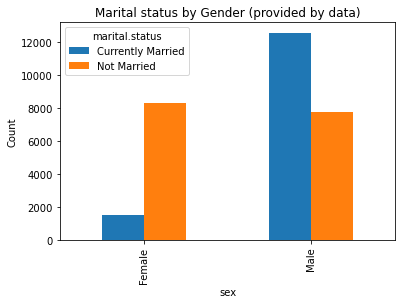

In [52]:
married_sex = pd.crosstab(df["sex"], df4["marital.status"])
married_sex.plot(kind = "bar", stacked = False)
plt.ylabel("Count")
plt.title("Marital status by Gender (provided by data)")
plt.show()

In [53]:
df4_married_income = df4.groupby(["marital.status", "sex"])["income"].agg(["sum", "count"])
df4_married_income["proportion"] = df4_married_income["sum"] / df4_married_income["count"]
df4_married_income.drop("sum", axis = 1)

count  proportion
marital.status    sex                      
Currently Married Female   1492    0.473190
                  Male    12594    0.452835
Not Married       Female   8290    0.048975
                  Male     7786    0.089006

In [54]:
df4_married_income.reset_index().drop("sum", axis = 1).to_csv("married_income_proportion.csv", index = False)

Through this table, we can see that proportion of people who earn more than 50K per year differs by marital status so much that even statistical test is meaningless. However, we could not observe the significant difference by gender. Furthermore, for married people, female had a higher proportion than male. One thing noteable is that the proportion of married was way lower for female than male in this data. This can be further analyzed using weights of each rows and deeply observing other variables.